In [45]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd


In [46]:
df = pd.read_excel(r'C:\Users\rramr\OneDrive\Desktop\Modern Scientist Global\dataset\renamedfeb21mlmar3.xlsx')

In [47]:
df=df.drop(columns=['id'])
df.head()

,status_1983,status_1984,status_1986,status_201213,sexr1,maternal_skin_color_r1,maternal_schooling_r1,monthly_family_income_mw_1_r1,monthly_family_income_q_r1,monthly_family_income_t_r1,...,no_of_bathrooms_r5,no_of_bathroom_shower_r5,pieces_for_sleep_r5,employment_sector_r5,type_of_job_r5,ISIC labour categories_r5,ISIC labour categories_r5.1,Paternal_age_2004,Age_at_2004_5,Height_adult
0,with weight information,with weight information,with weight information,Yes,1.0,black,8.0,1.1 to 3,3,2,...,1.0,1.0,2.0,navy military,administrative,Public administration and defence; compulsory ...,1.0,56.0,23.008898,180.65
1,without weight information,with weight information,with weight information,Yes,1.0,black,5.0,1.1 to 3,2,1,...,1.0,1.0,2.0,public road transport,bus driver,Transportation and storage,0.0,39.0,23.285421,180.35
2,with weight information,with weight information,with weight information,Yes,0.0,white,5.0,1.1 to 3,3,2,...,1.0,1.0,2.0,dental center,auxiliary secretary,Administrative and support service activities,1.0,NaN,NaN,164.95
3,with weight information,with weight information,with weight information,Yes,1.0,black,9.0,1 or less,2,2,...,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,182.30
4,without weight information,without weight information,without weight information,No,1.0,white,15.0,10,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
from scipy import stats
df['score_waisiii_iq_zscore_r5']=stats.zscore(df.score_waisiii_iq_r5,nan_policy='omit')

In [49]:
df_new=df[['Stunting','age_m_r4','sexr1','Age_gap_r1','maternal_schooling_r1','no_of_household_members_r3','household_assets_index_r3','score_waisiii_iq_r5','score_waisiii_iq_zscore_r5','Height_adult','type_of_employment_r5','worked_and_paid_r5.1','ISIC labour categories_r5.1','amount_recived_in_reais_last_month_r5','cohort_member_monthly_income_r5']]

In [50]:
df_new.head()

,Stunting,age_m_r4,sexr1,Age_gap_r1,maternal_schooling_r1,no_of_household_members_r3,household_assets_index_r3,score_waisiii_iq_r5,score_waisiii_iq_zscore_r5,Height_adult,type_of_employment_r5,worked_and_paid_r5.1,ISIC labour categories_r5.1,amount_recived_in_reais_last_month_r5,cohort_member_monthly_income_r5
0,No,47.408170,1.0,6.991102,8.0,4.0,5.7635,117.0,1.510429,180.65,Employee,Yes,1.0,4000.0,4000.0
1,No,49.643780,1.0,-0.285421,5.0,3.0,2.0026,103.0,0.399053,180.35,Employee,Yes,0.0,1642.0,1642.0
2,No,51.715010,0.0,NaN,5.0,3.0,3.4831,98.0,0.002132,164.95,Employee,No,1.0,NaN,622.0
3,No,48.920494,1.0,NaN,9.0,8.0,5.0815,75.0,-1.823701,182.30,NaN,No,NaN,NaN,0.0
4,NaN,NaN,1.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
total = df_new.isnull().sum().sort_values(ascending=False)
percent = (df_new.isnull().sum()/df_new.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > 95]

,Total,Missing Percent


In [52]:
df_new = df_new.dropna(thresh=df_new.shape[0]*0.05,how='all',axis=1)

In [53]:
df_outlier=df_new.copy()

In [54]:
df_outlier=df_new.select_dtypes(include='floating')

In [55]:
import warnings

warnings.filterwarnings('ignore')

In [56]:
def cap_data(df_outlier):
    for col in df_outlier.columns:
        print("capping the ",col)
        if (((df_outlier[col].dtype)=='float64') | ((df_outlier[col].dtype)=='int64') | ((df_outlier[col].dtype)=='float32')):
            percentiles = df_outlier[col].quantile([0.01,0.99]).values
            df_outlier[col][df_outlier[col] <= percentiles[0]] = percentiles[0]
            df_outlier[col][df_outlier[col] >= percentiles[1]] = percentiles[1]
        else:
            df_outlier[col]=df_outlier[col]
    return df_outlier

final_df=cap_data(df_outlier)

capping the  age_m_r4
capping the  sexr1
capping the  Age_gap_r1
capping the  maternal_schooling_r1
capping the  no_of_household_members_r3
capping the  household_assets_index_r3
capping the  score_waisiii_iq_r5
capping the  score_waisiii_iq_zscore_r5
capping the  Height_adult
capping the  ISIC labour categories_r5.1
capping the  amount_recived_in_reais_last_month_r5
capping the  cohort_member_monthly_income_r5


In [57]:
all_category_features=df_new.select_dtypes(include='object')

In [58]:
cat_dummies = pd.get_dummies(all_category_features, dummy_na=True)
cat_dummies.head()

,Stunting_No,Stunting_Yes,Stunting_nan,type_of_employment_r5_Employee,type_of_employment_r5_Employer,type_of_employment_r5_Self-employed / Autonomous,type_of_employment_r5_Study / paid internship,type_of_employment_r5_nan,worked_and_paid_r5.1_No,worked_and_paid_r5.1_Yes,worked_and_paid_r5.1_nan
0,1,0,0,1,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,1,0,0
4,0,0,1,0,0,0,0,1,0,0,1


In [59]:
df_outlier_concat = pd.concat([df_outlier, cat_dummies], axis=1)
df_outlier_concat.head()

,age_m_r4,sexr1,Age_gap_r1,maternal_schooling_r1,no_of_household_members_r3,household_assets_index_r3,score_waisiii_iq_r5,score_waisiii_iq_zscore_r5,Height_adult,ISIC labour categories_r5.1,...,Stunting_Yes,Stunting_nan,type_of_employment_r5_Employee,type_of_employment_r5_Employer,type_of_employment_r5_Self-employed / Autonomous,type_of_employment_r5_Study / paid internship,type_of_employment_r5_nan,worked_and_paid_r5.1_No,worked_and_paid_r5.1_Yes,worked_and_paid_r5.1_nan
0,47.408170,1.0,6.991102,8.0,4.0,5.7635,117.0,1.510429,180.65,1.0,...,0,0,1,0,0,0,0,0,1,0
1,49.643780,1.0,-0.285421,5.0,3.0,2.0026,103.0,0.399053,180.35,0.0,...,0,0,1,0,0,0,0,0,1,0
2,50.465700,0.0,NaN,5.0,3.0,3.4831,98.0,0.002132,164.95,1.0,...,0,0,1,0,0,0,0,1,0,0
3,48.920494,1.0,NaN,9.0,8.0,5.0815,75.0,-1.823701,182.30,NaN,...,0,0,0,0,0,0,1,1,0,0
4,NaN,1.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,1,0,0,1


In [60]:
df_impnew=df_outlier_concat.copy()

In [86]:
# use df_impnew for new imputation

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [123]:
from sklearn.impute import KNNImputer

In [124]:
def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=df_impnew.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

In [125]:
k_errors = optimize_k(data=df_impnew, target='score_waisiii_iq_zscore_r5')

In [126]:
k_errors

[{'K': 1, 'RMSE': 0.7625024274945198},
 {'K': 3, 'RMSE': 0.6834067807271449},
 {'K': 5, 'RMSE': 0.667392417370719},
 {'K': 7, 'RMSE': 0.6550555053459411},
 {'K': 9, 'RMSE': 0.6493262386435551},
 {'K': 11, 'RMSE': 0.6465245715919957},
 {'K': 13, 'RMSE': 0.6482143155478066},
 {'K': 15, 'RMSE': 0.6455722102251591},
 {'K': 17, 'RMSE': 0.6408937674876886},
 {'K': 19, 'RMSE': 0.6420967788916707}]

In [139]:
!pip install fancyimpute

  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [61]:
df_knn=df_outlier_concat.copy()

In [62]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_knn_imp = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)

In [63]:
df_knn_imp.isnull().sum().sort_values(ascending = False)

worked_and_paid_r5.1_nan                            0
amount_recived_in_reais_last_month_r5               0
sexr1                                               0
Age_gap_r1                                          0
maternal_schooling_r1                               0
no_of_household_members_r3                          0
household_assets_index_r3                           0
score_waisiii_iq_r5                                 0
score_waisiii_iq_zscore_r5                          0
Height_adult                                        0
ISIC labour categories_r5.1                         0
cohort_member_monthly_income_r5                     0
worked_and_paid_r5.1_Yes                            0
Stunting_No                                         0
Stunting_Yes                                        0
Stunting_nan                                        0
type_of_employment_r5_Employee                      0
type_of_employment_r5_Employer                      0
type_of_employment_r5_Self-e

In [64]:
df_knn_imp.to_csv(r'C:\Users\rramr\OneDrive\Desktop\Modern Scientist Global\dataset\df_knn_for_bayesian_just_wasiii.csv', encoding='utf-8', index=True)

In [20]:
X= df_knn_imp.filter(['age_m_r4', 'sexr1', 'Age_gap_r1', 'maternal_schooling_r1',
       'no_of_household_members_r3', 'household_assets_index_r3'
         , 'Stunting_Yes'
       ])   

Y=df_knn_imp['score_waisiii_iq_zscore_r5']
                     

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [22]:
X_featurenames = X.columns

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, Y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, Y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, Y_test)))

R^2 Training Score: 0.91 
OOB Score: 0.35 
R^2 Validation Score: 0.34


In [66]:
len(rf.estimators_)

100

In [71]:
pip install dtreeviz


  Created wheel for dtreeviz: filename=dtreeviz-1.1.4-py3-none-any.whl size=53575 sha256=0eff66cacc357a54e882046b8f68f6c8692abc19fed56ac1ac9058349feb8a20
  Stored in directory: c:\users\rramr\appdata\local\pip\cache\wheels\3f\82\0c\bcdd4cf9796c621c24dc77efa2ddd34b59e5c5f00d68949b65
Successfully built dtreeviz


In [72]:
from sklearn import tree
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

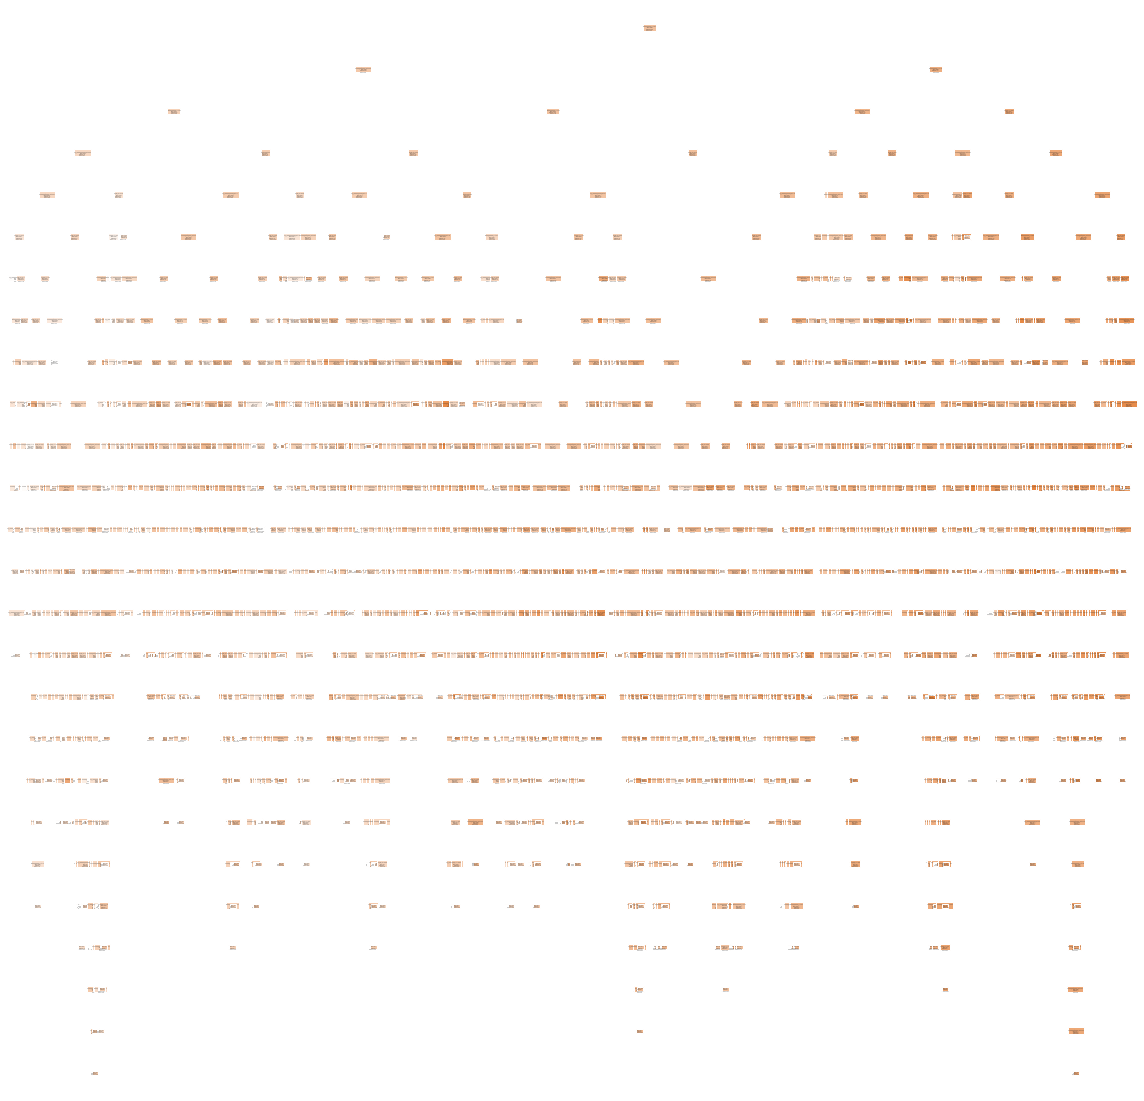

In [73]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

In [74]:
rf.estimators_[0].tree_.max_depth

25

In [ ]:
rf.estimators_[0].tree_.max_depth

In [76]:
rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

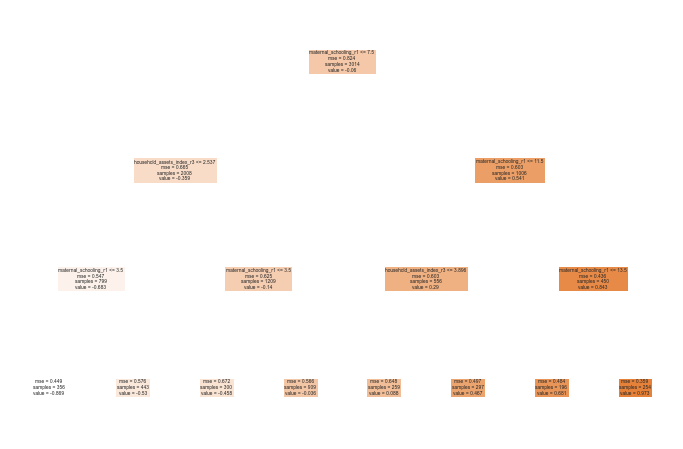

In [77]:
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

In [78]:
viz = dtreeviz(rf.estimators_[0], X, y, feature_names=X.columns, target_name="Y_train")
viz

NameError: name 'y' is not defined

In [25]:
Y_test[0:2]

1867   -0.474172
3042   -0.886969
Name: score_waisiii_iq_zscore_r5, dtype: float64

In [27]:
rf.predict(X_test[0:2])

array([-0.74376009, -0.88696892])

In [28]:
rf.feature_importances_

array([0.18910617, 0.02113731, 0.17884107, 0.31620324, 0.08165748,
       0.19375635, 0.01929838])

In [29]:
# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})

In [30]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [31]:
base_imp = imp_df(X_train.columns, rf.feature_importances_)
base_imp

,feature,feature_importance
0,maternal_schooling_r1,0.316203
1,household_assets_index_r3,0.193756
2,age_m_r4,0.189106
3,Age_gap_r1,0.178841
4,no_of_household_members_r3,0.081657
5,sexr1,0.021137
6,Stunting_Yes,0.019298


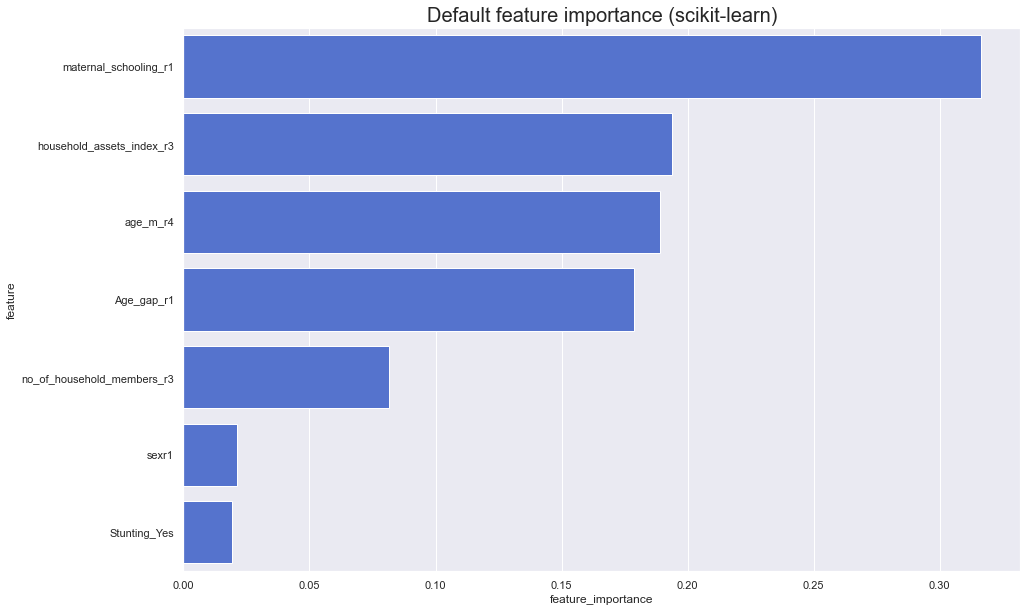

In [32]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

In [33]:
import numpy as np

In [34]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                    feature_names=X_featurenames, 
                    class_names=['score_waisiii_iq_zscore_r5'], 
                    categorical_features=['Stunting_Yes','Stunting_No','sexr1'],
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')

Intercept -0.49314011067701385
Prediction_local [0.78722388]
Right: 0.8337597515021716


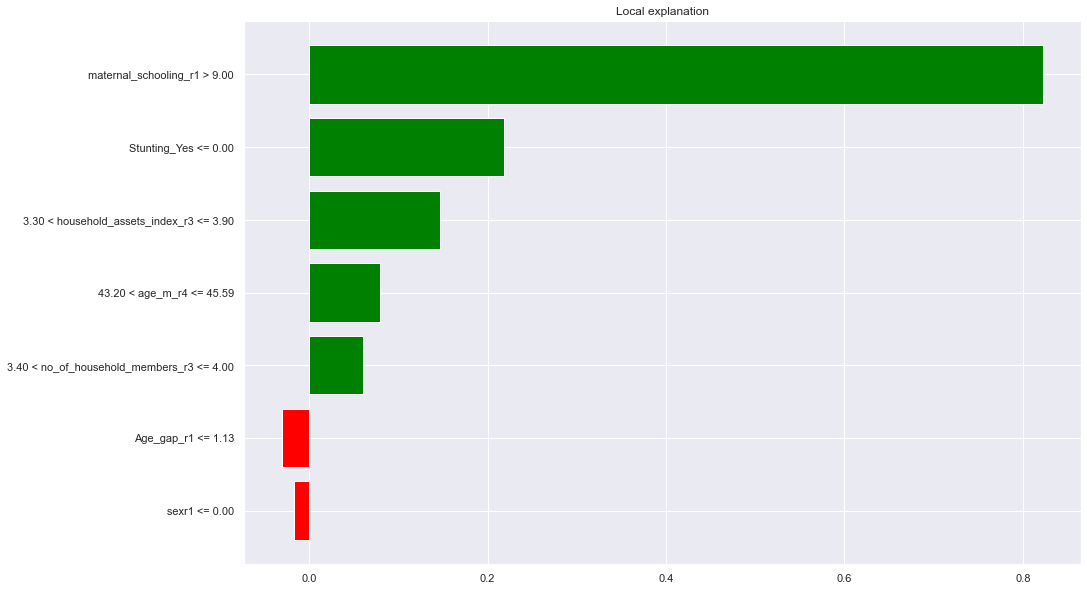

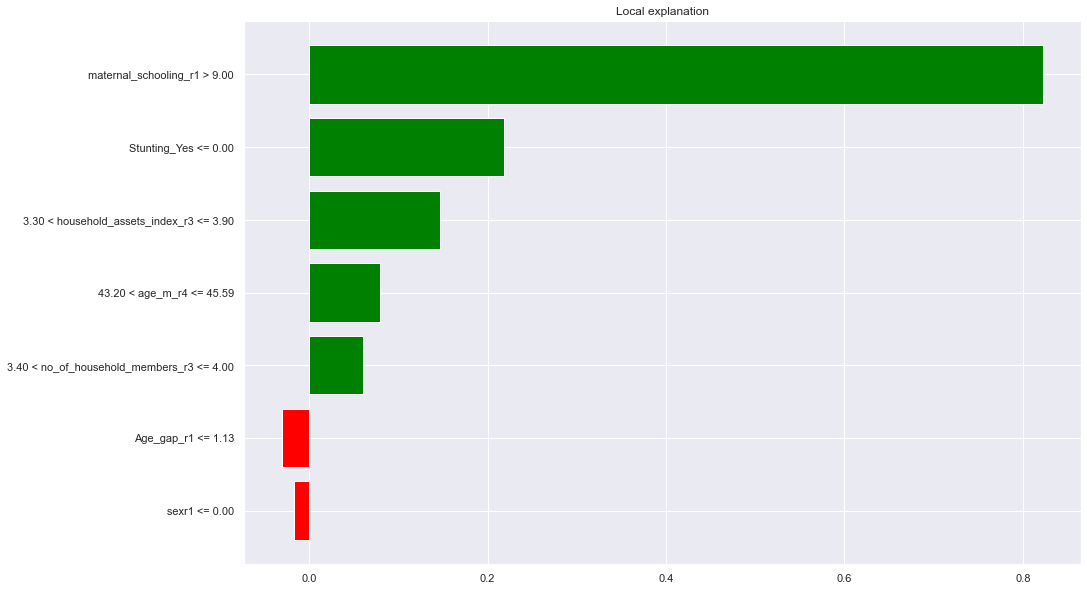

In [40]:
exp = explainer.explain_instance(X_test.iloc[5], 
     rf.predict, num_features=10)
exp.as_pyplot_figure()

In [41]:
pd.DataFrame(exp.as_list())


,0,1
0,maternal_schooling_r1 > 9.00,0.822175
1,Stunting_Yes <= 0.00,0.218936
2,3.30 < household_assets_index_r3 <= 3.90,0.146894
3,43.20 < age_m_r4 <= 45.59,0.079511
4,3.40 < no_of_household_members_r3 <= 4.00,0.060928
5,Age_gap_r1 <= 1.13,-0.030829
6,sexr1 <= 0.00,-0.017251


In [42]:
exp.show_in_notebook(show_table=True, show_all=False)


# shapely

### Shapley values calculate the importance of a feature by comparing what a model predicts with and without the feature. However, since the order in which a model sees features can affect its predictions, this is done in every possible order, so that the features are fairly compared.